# Image Recognition

#### Importing directories

In [1]:
import keras
from keras.datasets import cifar10
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.models import Sequential
from pathlib import Path
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Nitin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Loading Data

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

#### Assigning Lables explictly

In [3]:
class_labels=[
    "Plane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

#### Preprocessing images

In [4]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
x_train=x_train/255
x_test=x_test/255

In [5]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

#### Define Model

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(63,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 63)        18207     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36352     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

#### Compile Model

In [7]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
#### Train Model

In [8]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=8,
         validation_data=(x_test,y_test)
         )

Train on 50000 samples, validate on 10000 samples
Epoch 1/8
50000/50000 [==============================] - 1009s 20ms/step - loss: 1.5734 - acc: 0.4288 - val_loss: 1.2492 - val_acc: 0.5606
Epoch 2/8
50000/50000 [==============================] - 909s 18ms/step - loss: 1.1878 - acc: 0.5760 - val_loss: 1.0408 - val_acc: 0.6313
Epoch 3/8
50000/50000 [==============================] - 964s 19ms/step - loss: 1.0108 - acc: 0.6414 - val_loss: 0.8590 - val_acc: 0.6988
Epoch 4/8
50000/50000 [==============================] - 899s 18ms/step - loss: 0.8962 - acc: 0.6831 - val_loss: 0.8242 - val_acc: 0.7102
Epoch 5/8
50000/50000 [==============================] - 1074s 21ms/step - loss: 0.8074 - acc: 0.7150 - val_loss: 0.7528 - val_acc: 0.7350
Epoch 6/8
50000/50000 [==============================] - 1054s 21ms/step - loss: 0.7369 - acc: 0.7388 - val_loss: 0.7223 - val_acc: 0.7462
Epoch 7/8
50000/50000 [==============================] - 1056s 21ms/step - loss: 0.6797 - acc: 0.7609 - val_loss: 0.702

#### Loading Image To Check performence of model

C:\Users\Nitin\Anaconda3\lib\site-packages\PIL\Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


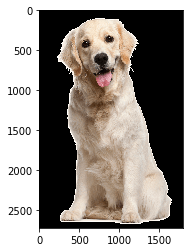

In [9]:
pic=image.load_img("dog_PNG50321.png")
plt.imshow(pic)
img=image.load_img("dog_PNG50321.png",target_size=(32,32))
img=image.img_to_array(img)
list_of_img=np.expand_dims(img,axis=0)

#### Predicate result

In [10]:
result=model.predict(list_of_img)
single_result=result[0]

In [11]:
most_likely_class_index=int(np.argmax(single_result))
class_likelihood=single_result[most_likely_class_index]
class_label=class_labels[most_likely_class_index]

In [15]:
print("The test image of '{}' with likelihood of {:2f}".format(class_label,class_likelihood))

The test image of 'Dog' with likelihood of 1.000000
